# Yolov3 application on the filopodia 
1 Build the setup: 
Please make that your compiling kernel is set to a terminal in your enviral enviroment.
the graphs and data information are gained with: *

### Build the setup ### 

In [1]:
# libraries  
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt
import glob

from pytorchyolo import detect, models, train, test
from scipy.stats import gaussian_kde
from natsort import natsorted
from pyexcel_xlsx import get_data
from itertools import groupby
import pandas as pd
import subprocess
from tools import *
import csv
from IPython.display import Image

# Set environment variables
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PATH'] = '/usr/local/cuda/bin:' + os.environ.get('PATH', '')
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:' + os.environ.get('LD_LIBRARY_PATH', '')
# ! export PATH=/usr/local/cuda/bin:$PATH
# ! export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH


2025-03-07 19:38:39.801163: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 19:38:39.821470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741372719.854565   21222 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741372719.865098   21222 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 19:38:39.890027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# set the working directory
os.chdir( "your dir")

FileNotFoundError: [Errno 2] No such file or directory: 'your dir'

In [ ]:
# the provided implemenation can only be conducdet in a gpu that support cuda. 
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [ ]:
#example of how the bounding box looks like on the origninal image
example="R1_P30_1_270"
vis_picture(filename="R6_P40_4",
            image_path="data/custom_philo_generated/images", 
            label_path="data/custom_philo_generated/labels",
            pred_label_path= "data/custom_philo_generated/predicted_labels2",
            output_path="output",
            show=True,
            bounding_box=True
            )

### generated data ###
generated data is not used in the filopodia tip detection serach by Vinzent Aschir, due to worst performance.   
the alternative dataset is a mix between the labritory acquired data and 1000 images that are generated and provided by Eric Reifenstein.

the following cell will conclude the difference of including generated data

## tools ##

### bounding_box_resize: tool for editing shifting all the images from a folder to another one in parallel

./change_dir.sh <type: bolean, delete old directory> <type: directory, origin directory> <type: directory, destination directory>

In [ ]:
%%sh 
#edit bounding box 
#now let's change the bounding box size in the folder edit_labels. to the recommended 0.06 for custom data and 0.05 for generated data. 
#./bounding_box_resize.sh "data/custom_philo_generated/edit_labels" 0.06 0.05

### visualisation range of accepted distance to be considered as a True Positive. ###

In [2]:
#vis: accepted distance  
example="R2_P35_1"#R1_P30_1_270, R5_P40_10_270 R6_P28_8 R6_P35_9_270 R1_P35_0
vis_picture(filename="R6_P40_10.jpg",
            image_path="data/custom_rot/images", 
            label_path="data/custom_rot/labels",
            pred_label_path= None, #"data/custom_philo_generated/predicted_labels",
            output_path="visualisation",
            show=True,
            bounding_box=False, #show bounding box
            ac_d=15# accepted distance drawn at 15 
            )


error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:836: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


### change_dir: tool for shifting all the files from one folder to another in parallel ##

In [ ]:
via bash:
#! ./change_dir.sh false "/data/custom_philo_generated/labels" "data/custom_philo_generated/edit_labels" true

In [ ]:
#via python: 
cur_dir= "./data/custom_philo_generated/labels_edit/" #where the labels are saved
bounding_box_custom = 0.06 #bounding box size custom data 
bb_gen = 0.05 # bounding box size generated data (none here) 

change_bb_cmd = [ #comand we wanna get excecuted by bash: 
    "./bounding_box_resize.sh", cur_dir, str(bounding_box_custom), str(bb_gen)
]
#subprocess.run(change_bb_cmd) #run the command

In [ ]:

# change_dir.sh <type:bolean, "delete content in destination folder"> <source folder> <destination folder> <type:bolean, "copy content instead of moving">
# ./change_dir.sh false "/data/custom_philo_generated/labels" "data/custom_philo_generated/edit_labels" true

#resize bounding-boxes: 
cur_dir= "./data/custom_philo_generated/labels_edit/" #where the labels are saved
bounding_box_custom = 0.06 #bounding box size custom data 
bb_gen = 0.05 # bounding box size generated data (none here) 

change_bb_cmd = [ #comand we wanna get excecuted by bash: 
    "./bounding_box_resize.sh", cur_dir, str(bounding_box_custom), str(bb_gen)
]
# subprocess.run(change_bb_cmd) #run the command

./bounding_box_resize.sh: line 42: cd: ./data/custom_rot/labels_edit/: No such file or directory
sed: couldn't edit __pycache__: not a regular file
sed: sed: couldn't edit checkpoints: not a regular file
couldn't edit config: not a regular file
sed: couldn't edit csv: not a regular file
sed: couldn't edit data: not a regular file
sed: couldn't edit logs: not a regular file
sed: couldn't edit output: not a regular file


custom files:


sed: couldn't edit pytorchyolo: not a regular file
sed: couldn't edit visualisation: not a regular file
sed: couldn't edit weights: not a regular file


already editet: 33 and 0 failed. 
all 34 custom files editet and 0 failed.
generated_files:

all 0 generated files editet and 0 failed.


CompletedProcess(args=['./bounding_box_resize.sh', './data/custom_rot/labels_edit/', '0.06', '0.05'], returncode=0)

### extract and shape data out of original files
In the next cell, the label files will be created and the oridinal data will be elarged by rotating every image by for times 90 degrees. For data access please contact Eric Reifenstein. 

In [3]:
 
#%%
# extract data from original files in the right format for yolov3 provided by Eric Reifenstein 

from tools import rotate_coord 
# from natsort import natsorted

### changing parameters:
boxsize = 0.06 # why this size?
rotate = True # to elarge the data x4 by adding 3 rotated versions of the image 

#where we downloaded the data in: 
original_pic_directory = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/original_data/Single_Live_PR_Pictures"
original_label_directory = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/original_data/Filopodia_Base_Quantification"

#where we need the data to be for the training: 
destiny_pic_directory = "data/custom_rot/images/"
destiny_label_directory = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/labels/"
###

### get the data from the excel file and save it in the right format and place
# loop over receptors and time points
hours_save = [25, 30, 35, 40]
for rec in [1, 2, 3, 4, 5, 6]:
    print('Receptor ' + str(rec))
    if rec == 1 or rec == 2 or rec == 5 or rec == 6:
        hours = [27, 31, 36, 41]
    elif rec == 3:
        hours = [26, 30, 35, 40]
    elif rec == 4:
        hours = [27, 31, 36, 39]
    
    for hh, hour in enumerate(hours):
        print(str(hour) + ' hAPF')
        img_paths = natsorted(glob.glob(original_pic_directory + '/R' + str(rec) + '/P' + str(hours_save[hh]) + '/*'))
        datpath = original_label_directory + '/R' + str(rec) + "/R"+ str(rec) + "_" + str(hour) + "hAPF.xlsx"
        
        if rec == 3: #load filopodia data from the excel file (split the data into subarrays based "X")
            if hh == 0:
                dat_fronts = pd.read_excel(datpath, usecols='D, E')
                dat_xfront, dat_yfront = np.array(dat_fronts['Unnamed: 3']), np.array(dat_fronts['Unnamed: 4'])
            else:
                dat_fronts = pd.read_excel(datpath, usecols='C, D')
                dat_xfront, dat_yfront = np.array(dat_fronts['Unnamed: 2']), np.array(dat_fronts['Unnamed: 3'])
        else:
            dat_fronts = pd.read_excel(datpath, sheet_name='Front and Front Filopodia', usecols='C, D')
            dat_xfront, dat_yfront = np.array(dat_fronts['Unnamed: 2']), np.array(dat_fronts['Unnamed: 3'])
        idx = np.where(dat_xfront=='X')[0]
        subarrs_front_x = np.split(dat_xfront, idx+1)[1:]
        subarrs_front_y = np.split(dat_yfront, idx+1)[1:]
        
        if rec != 3: 
            dat_heels = pd.read_excel(datpath, sheet_name='Heel and Heel Filopodia', usecols='C, D')
            dat_xheel, dat_yheel = np.array(dat_heels['Unnamed: 2']), np.array(dat_heels['Unnamed: 3'])
            idx = np.where(dat_xheel=='X')[0]
            subarrs_heel_x = np.split(dat_xheel, idx+1)[1:]
            subarrs_heel_y = np.split(dat_yheel, idx+1)[1:]
        
        for i, ip in enumerate(img_paths): #Load each image. Extract and process filopodia coordinates. Combine heel and front filopodia coordinates if applicable.
            img = cv2.imread(ip)

            xfil_front = np.array([elem for elem in subarrs_front_x[i] if isinstance(elem, (float, int)) and not np.isnan(elem)])[1:] # exclude front
            yfil_front = np.array([elem for elem in subarrs_front_y[i] if isinstance(elem, (float, int)) and not np.isnan(elem)])[1:]
            if rec == 3:
                xfil = xfil_front.copy()
                yfil = yfil_front.copy()
            else:
                xfil_heel = np.array([elem for elem in subarrs_heel_x[i] if isinstance(elem, (float, int)) and not np.isnan(elem)])[1:-1] # exclude heel and core border dot
                yfil_heel = np.array([elem for elem in subarrs_heel_y[i] if isinstance(elem, (float, int)) and not np.isnan(elem)])[1:-1]
                if rec == 5:
                    xfil = np.r_[xfil_heel, xfil_front]
                    yfil = 512 - np.r_[yfil_heel, yfil_front]
                else:
                    xfil = np.r_[xfil_heel, xfil_front]
                    yfil = np.r_[yfil_heel, yfil_front]
            
            # plt.figure()
            # plt.imshow(img)
            # plt.scatter(xfil, yfil)
            
        ### create 3 rotated versions of the image
        # rotate the data
            if rotate: 
                img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
                x90, y90 = rotate_coord(xfil-512, yfil-256, np.pi/2)
                x90 += 256
                y90 += 512

                img_180 = cv2.rotate(img, cv2.ROTATE_180)
                x180, y180 = rotate_coord(xfil-512, yfil-256, np.pi)
                x180 += 512
                y180 += 256

                img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
                x270, y270 = rotate_coord(xfil-512, yfil-256, -np.pi/2)
                x270 += 256
                y270 += 512

        # original data save 
            # save image 
            filename = "R"+str(rec)+"_P"+str(hours_save[hh])+"_"+str(i)
            cv2.imwrite(destiny_pic_directory + filename + ".jpg", img)    

            # save labels
            f = open(destiny_label_directory + filename + ".txt", "w")
            for j in range(len(xfil)):
                # label_idx x_center y_center width height
                # f.write("0 " + str(xfil[j]/1024) + ' ' + str(yfil[j]/512) + ' ' + str(25/1024) + ' ' + str(25/512) + '\n')
                f.write("0 " + str(xfil[j]/1024) + ' ' + str(yfil[j]/512) + ' ' + str(boxsize) + ' ' + str(boxsize) + '\n')
            f.close()

            if rotate: 
                # 90 degrees rotateted data save 
                filename = "R"+ str(rec) +"_P"+str(hours_save[hh])+"_"+str(i)+'_90'
                cv2.imwrite(destiny_pic_directory + filename + ".jpg", img_90)    

                # save labels for training
                f = open(destiny_label_directory + filename + ".txt", "w")
                for j in range(len(xfil)):
                    # label_idx x_center y_center width height
                    # f.write("0 " + str(xfil[j]/1024) + ' ' + str(yfil[j]/512) + ' ' + str(25/1024) + ' ' + str(25/512) + '\n')
                    f.write("0 " + str(x90[j]/512) + ' ' + str(y90[j]/1024) + ' ' + str(boxsize) + ' ' + str(boxsize) + '\n')
                f.close()

                # 180 degrees rotateted data save
                filename = "R"+str(rec)+"_P"+str(hours_save[hh])+"_"+str(i)+'_180'
                cv2.imwrite(destiny_pic_directory + filename + ".jpg", img_180)    

                # save labels
                f = open(destiny_label_directory + filename + ".txt", "w")
                for j in range(len(xfil)):
                    # label_idx x_center y_center width height
                    # f.write("0 " + str(xfil[j]/1024) + ' ' + str(yfil[j]/512) + ' ' + str(25/1024) + ' ' + str(25/512) + '\n')
                    f.write("0 " + str(x180[j]/1024) + ' ' + str(y180[j]/512) + ' ' + str(boxsize) + ' ' + str(boxsize) + '\n')
                f.close()

                # 270 degrees rotateted data save
                filename = "R"+str(rec)+"_P"+str(hours_save[hh])+"_"+str(i)+'_270'
                cv2.imwrite(destiny_pic_directory + filename + ".jpg", img_270)

                # save labels for training
                f = open(destiny_label_directory + filename + ".txt", "w")
                for j in range(len(xfil)):
                    # label_idx x_center y_center width height
                    # f.write("0 " + str(xfil[j]/1024) + ' ' + str(yfil[j]/512) + ' ' + str(25/1024) + ' ' + str(25/512) + '\n')
                    f.write("0 " + str(x270[j]/512) + ' ' + str(y270[j]/1024) + ' ' + str(boxsize) + ' ' + str(boxsize) + '\n')
                f.close()

Receptor 1
27 hAPF


ValueError: Excel file format cannot be determined, you must specify an engine manually.

## training the model ##

In [ ]:
xseed=42

In [ ]:
# write train and valid file: (90% train, 10% validation)

x_n_data, xval, xcust_only = write_train_valid(directory="./data/custom_rot",
    val=0.1,
    cust_only=True,
    seed=xseed)

NameError: name 'glob' is not defined

In [ ]:
#Add .train file 
ac_dir ="/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot"

#run the bash script to create the train file in the config folder (makes also the .names file if not present): 
! ./make_train_file.sh $ac_dir 

All required folders and files are present.


In [ ]:
#train the model: 
import subprocess
import os

# parameters for the training:
x_model = "config/yolov3-tiny-custom.cfg" 
x_data = "config/custom_rot.data"
x_epochs = 30
x_iou_thres = 0.5 
x_conf_thres = 0.2 #change 
x_nms_thres = 0.5
x_pretrained_weights = None # "checkpoints/yolov3_ckpt_25.pth"
x_multi_scale = True

#for further paramater settings and the actual yolov3 cmd have a look at the train_yolo.py file.

training_cmd = [ #the command we wanna execute in a bash environment in a subprocess. 
    "poetry", "run", "python", "train_yolo.py",
    "--model", x_model,
    "--data", x_data,
    "--epochs", str(x_epochs),
    "--iou_thres", str(x_iou_thres),
    "--conf_thres", str(x_conf_thres),
    "--nms_thres", str(x_nms_thres),
    "--seed", str(xseed),
    "--n_cpu", str(1), #this is nessesary for not killing the data loader in the training.
    '--checkpoint_interval', str(5),
    #'--pretrained_weights', str(x_pretrained_weights), # comment this out if pretrained_weights is none.   
    "--multiscale_training" if x_multi_scale else ''
]
#start the training in a subprocess: 
process = subprocess.Popen(training_cmd) # create a new subprocess that the training doesn't affect the notebook. 

#TensorBoard_cmd = ["poetry", "run", "tensorboard", "--logdir=logs", "--port=6006"]
#TensorBoard_process = subprocess.Popen(TensorBoard_cmd) # start the tensorboard for showing the progress.

process.wait() # waiting until the subprocess and the training ended. 

tmp_file_path = 'train.tmp'
if os.path.exists(tmp_file_path): 
    with open(tmp_file_path, 'r') as f:
        x_train_time = f.read().strip()
        os.remove(tmp_file_path)
else:        
    raise FileNotFoundError("The subprocess hasn't ended yet. The tmp file does not exist.")

# command for starting the training in a shell:

#! poetry run python train_yolo.py --model $x_model  --data $x_data --epochs $x_epochs --iou_thres $x_iou_thres --conf_thres $x_conf_thres --nms_thres $x_nms_thres --seed $xseed --pretrained_weights $x_pretrained_weights --multiscale_training

#track the training process: 
#!poetry run tensorboard --logdir='logs' --port=6006 #requires tensorboard and an poetry environment
# see the process in the browser: http://localhost:6006/


NameError: name 'xseed' is not defined

In [ ]:
# this cell is to move output and weights to the right folder: 
ac_dir = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot" 
dest_dir = ac_dir + "/train_conf_thres/0.15" 

! ./change_dir.sh true "./checkpoints/" $dest_dir true  

/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/train_conf_thres/0.15 doesn_t exist yet.
chmod: cannot access '755': No such file or directory

all 6 files copied from ./checkpoints/ to /mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/train_conf_thres/0.15
content deleted at: ./checkpoints/


In [ ]:
# to kill the subprocess with the training that we started in the background. 
process.terminate()
if os.path.exists("train.tmp"):
    os.remove("train.tmp") 

cell to store the setting for training and their results in an excel file: 
    which groundsettings did we use for the training? 
    which data how many pictures? 
    how much time did we take? 
    what is the result? with which settings? 

/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/pytorchyolo/models.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

0187
TP:  17 , FP:  46 , FN:  0 , OD:  46 , NH:  0 , Sensitivity:  1.0 , predicted points:  10 , manual points:  17

 Number of pictures:  1 Number of not annotated pictures: 0 , Sensitivity:  1.0 , over detection rate:  2.705882 , no-hit-point-rate:  0.0 

Bild mit Bounding Boxes gespeichert: None



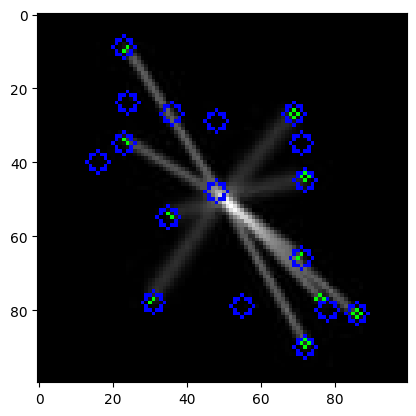

In [ ]:
# function to perform detection one one input picture. 
#the model should already be loaded to save time.

#To DO: The issue is that we are not only doing the statistics here of the points, we are also doing the prediction. 
# do we outsource the prediction to another function? storing them in a file so we can also visualize them with the visualise function? 

#in the statistics: we should look ip in the matrix which coloumn didnt didnt got a minimum. that we can mark all the points in a different color for example that were over detected. 
#we can give as an output then the number of overdetected points. 
#we can also give the number of points that were not detected. 
#later we an build an extimator which points were well detected but not right in the given data? 
# check if in bounding box is something white? -> claim point as over detected -> no show the picture and add the point to the given data. 
 
from scipy.spatial import distance
from tools import * 
from pytorchyolo import detect, models 

def detect_picture(filename="R1_P35_8_90",
                   img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/images",
                   pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/predicted_labels2",
                   model = models.load_model("config/yolov3-tiny-custom.cfg", "data/custom_philo_generated/checkpoints100/yolov3_ckpt_100.pth"),
                   conf_thres=0.01,
                   nms_thres=0.1,
                   accepted_distance = 35, # how many pixels are allowed between annotated and predicted point to be wrong?
                   stat_all_pics= None, # for statistics is there an statistix object to store over every picture? 
                   output=None, # for visualisation: where should we store the visualized picture? None is possible! 
                   bounding_box = False, # for visualisation: should we show the bounding box?
                   show = True):

    #catching common errors

    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.txt'): #check if the filename got also its ending. 
        filename= filename[:-len('.jpg')]

    pic_path= f"{img_path}/{filename}.jpg"

    if pred_label_path.endswith('.txt'):
        raise TypeError("in the variable pred_label_path should contain only the directory not specific files.")
    
    if img_path.endswith('.txt'):
        raise TypeError("in the variable img_path should contain only the directory not specific files.")

    if not os.path.exists(pic_path):
            raise FileNotFoundError(f"Bild nicht gefunden: {pic_path}")
 
    #statistics inizialisation: 
    # if stat_all_pics is None: 
    #         stat_all_pics = statistix()
    stat = stat_pic() #create a statistic object for one pic 

    if 'R3' not in filename: # heel filopodia are not annotated in the R3 manual data (this data is incomplete)
    #parameters: 
        
        #load the image
        img = cv2.imread(pic_path)#.split('\n')[0]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #get the absolute heights and widths of the image to scale the relative numbers back to the original size
        img_height, img_width =img.shape[0], img.shape[1]
        
        #creates the label path to the given image_path
        original_label_path = (pic_path.split('.jpg')[0] + '.txt').replace('images', 'labels')
        
        #load manual labels
        original_labels = np.genfromtxt(original_label_path, delimiter=' ')#whats in the label file?

    #load coordinates: 
        #put the relative coordinates back to absolute coordinates depending on their rotation:
        pos_man = np.c_[original_labels[:, 1] * img_width, original_labels[:, 2] * img_height]           

        boxes = detect.detect_image(model, img, conf_thres=conf_thres, nms_thres=nms_thres)
        boxes=np.round(boxes,decimals=2)
        
        pos_pred = np.c_[(boxes[:, 0] + boxes[:, 2])/2, (boxes[:, 1] + boxes[:, 3])/2] #Umrechnung der Koordinaten auf die Mitte der Box.
        
        #store the predicted coordinates in a pred_label file: 
        predicted_labels = np.zeros((pos_pred.shape[0], 5))
        predicted_labels[:, 0] = boxes[:,5]  # Copy class labels
        predicted_labels[:, 2] = (boxes[:, 1] + boxes[:, 3]) / (2 * img_height) # Normalize x_center and y_center
        predicted_labels[:, 1] = (boxes[:, 0] + boxes[:, 2]) / (2 * img_width)
        predicted_labels[:, 3] = (boxes[:, 2] - boxes[:, 0]) / img_width # Normalize width and height
        predicted_labels[:, 4] = (boxes[:, 3] - boxes[:, 1]) / img_height

        #save the predicted labels in a new file
        if pred_label_path is None:
            pred_label_path = original_label_path.replace('labels', 'predicted_labels')
        else: 
            if not os.path.exists(pred_label_path): ### sollte das nicht evtl in eine übergeordnete funktion die nicht per bild geht? 
                print(f"Directory created: {pred_label_path}")
                os.makedirs(pred_label_path)
                
            pred_label_path_file = os.path.join(pred_label_path, filename) + '.txt'
         # Save predicted labels to a new file this way to influence the float length. 
        with open(pred_label_path_file, 'w+') as f: 
            for row in predicted_labels:
                f.write(f"{int(row[0])} {row[1]:.6f} {row[2]:.6f} {row[3]:.2f} {row[4]:.2f}\n") #lets round the predicted coordinates.
    
        if show: 
            print(filename)
            #print(f"Predicted labels saved: {pred_label_path_file}") ### evtl. weglassen man muss nicht alles anzeigen. 
    
    #let's do the statistics:
        
        if not isinstance(stat_all_pics,statistix) and stat_all_pics is not None:
            raise TypeError("stat_all_pics has not the input of a statistix object")

        D = distance.cdist(pos_pred, pos_man, metric = 'euclidean') # distance matrix
        
        stat.calculate(D, accepted_distance)
        if stat_all_pics is not None: 
            stat_all_pics.add_pic(stat)
            
        if show: 
            stat.print_values() 
        if show and stat_all_pics is not None: 
            stat_all_pics.print_values() ### do we need them twice? maybe only per picture?
        
        filename=f"{filename}.jpg"
        
        vis_picture(filename=filename,
                    image_path=img_path,
                    label_path=img_path.replace('images', 'labels'),
                    pred_label_path=pred_label_path,
                    output_path=output, 
                    bounding_box=bounding_box,
                    show=show
                    )
    # #add predicted and actual philopodia ends to the image:
    #     for pm in pos_man: 
    #         cv2.circle(img, (int(pm[0]), int(pm[1])), 3, color=(0, 255, 0)) #green is the manual annotation
    #     for pa in pos_pred:
    #         cv2.circle(img, (int(pa[0]), int(pa[1])), 3, color=(0, 0, 255)) #blue is the predicted annotation
    #     plt.figure()
    #     plt.imshow(img)

    else:
        if show: 
            print(f'{filename} is R3 data and not annotated')
            print()
        stat.set_annotated()
        if stat_all_pics is not None:
            stat_all_pics.add_pic(stat)

    return stat_all_pics

mystats = statistix() 
model = models.load_model("config/yolov3-tiny-custom.cfg", "data/custom_philo_generated/checkpoints100/yolov3_ckpt_100.pth") #load the trained model with its weights

#detect_picture(stat_all_pics=mystats)

#visualize the detections
# vis_picture(img, detections)
#  vis_picture(filename="R1_P35_8_90",
             # label_path="data/custom_philo_generated/labels",
             #pred
             # output_path="output", 
             # show=True,
             # ) #label_path="../../yolo_test/data/custom/labels",
# def vis_picture(filename="R3_P35_22_90",
# image_path=f"data/custom_philo_generated/images", 
# ,
# output_path="output",
# show=False):
#R6_P40_10_180.jpg
#R6_P40_11_180.jpg
#R6_P40_7_90.jpg
detect_picture(filename= "0187.jpg",
                   img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/images",
                   pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/predicted_labels2",
                   model = model,
                   conf_thres=0.01,
                   nms_thres=0.1,
                   accepted_distance = 35,
                   stat_all_pics= mystats, 
                   show = True
                )
#detect_picture(filename="R6_P40_10_180",img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/images", stat_all_pics=mystats,show=False)
#detect_picture(filename="R6_P40_7_90",img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_philo_generated/images", stat_all_pics=mystats)

In [ ]:
if not os.path.exists(original_label_path):
            raise FileNotFoundError(f"Labeldatei nicht gefunden: {original_label_path}")

In [ ]:
#Auswertung und erstellen der Statistik über alle Bilder  

from pytorchyolo import detect, models
import importlib
import tools  
#importlib.reload(tools) 
from tools import statistix, stat_pic, vis_picture
from datetime import datetime

#for tracking the compilation time
start_time = datetime.now()

all_stats = statistix() # create a statistic object 

file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()
#now we go through all the pictures we wanna add to the statistics: 

# Parameter:
ev_conf_thres=0.01
ev_nms_thres=0.1
ev_accepted_distance=15
model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/check_this") #load the trained model with its weights

for val_file in val_paths:
    val_file = val_file.split('/')[-1]
    detect_picture(filename= val_file.rstrip(),
                   img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images",
                   pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/predicted_labels",
                   model = model, #we use the once loaded model from the cell above to not waist time. 
                   conf_thres=ev_conf_thres,
                   nms_thres=ev_nms_thres,
                   accepted_distance = ev_accepted_distance,
                   stat_all_pics= all_stats, 
                   show = False
                )
#stop the compilation time
end_time = datetime.now()
duration = end_time - start_time 

# Calculate duration in d/h/m/s format
days = duration.days
hours, remainder = divmod(duration.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
ev_time=duration_str
# Print the duration
print('Duration:', duration_str)
### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
all_stats.print_values()
x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = all_stats.x_get_values()


box: no predicted points in R1_P30_9_90
box: no predicted points in R4_P40_11_90
box: no predicted points in R6_P25_8
box: no predicted points in R4_P25_4_90
box: no predicted points in R4_P40_5_270
box: no predicted points in R2_P25_1_270
box: no predicted points in R4_P25_10_180
box: no predicted points in R6_P30_5_180
box: no predicted points in R6_P25_2_180
box: no predicted points in R4_P40_3
box: no predicted points in R4_P35_0
box: no predicted points in R1_P35_0_270
box: no predicted points in R5_P25_3_90
box: no predicted points in R5_P25_0
box: no predicted points in R4_P30_2_180
box: no predicted points in R2_P25_10_90
box: no predicted points in R1_P35_7_270
box: no predicted points in R4_P40_8_90
box: no predicted points in R1_P25_8
box: no predicted points in R4_P40_11
box: no predicted points in R2_P25_7_270
box: no predicted points in R2_P40_8_270
box: no predicted points in R2_P35_0
box: no predicted points in R5_P35_6_270
box: no predicted points in R5_P30_10_180
box:

Here is a visual breakdown of ten cells to see the acceptance range of an hitpoint.
shown on 10 images and stored in the *output* directory. 
The thresholds can be adjusted based on the prefference of not having to many predicted points or or not so many _TP_.

Also check on how strict you wanna be with the acceptance distance by looking into folder *visalisation/acceptance_distance*

In [ ]:
# visual breakdown 10 pic 
! cp data/custom_rot/valid.txt data/custom_rot/basline/yolov3_ckpt_100.pth checkpoint/basline_100.pth
#parameters
ev_conf_thres=0.01
ev_nms_thres=0.1
ev_accepted_distance=15
model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/baseline_100.pth") 

#wir könnten nochmal 10 zufällige aus der Validation datei ziehen, dadurch dass diese Datei aber in einer zufälligen Reihenfolge gezogen wurde, schauen wir uns einfach die ersten 10 an. 
file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()
for i in range(10): 
    detect_picture(filename= val_paths[i].rstrip().split('/')[-1],
                   img_path = "data/custom_rot/images",
                   pred_label_path = "data/custom_rot/predicted_labels",
                   model = model,
                   conf_thres=ev_conf_thres,
                   nms_thres=ev_nms_thres,
                   accepted_distance = ev_accepted_distance,
                   stat_all_pics= None, 
                   output=output,
                   show = True
                )

cp: target 'checkpoint/basline_100.pth': No such file or directory


/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/pytorchyolo/models.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

IndexError: list index out of range

In [ ]:
#current Date, Gpu, is wsl, cwd in windows
import torch
from datetime import datetime
import os

# current time 
now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S") #format the time 

# current gpu 
x_gpu =torch.cuda.get_device_name(0) # extract the gpu name 

#current working env 
def detect_environment():
    in_wsl = False
    in_windows = False

    # Prüfen, ob WSL läuft
    try:
        with open("/proc/sys/kernel/osrelease", "r") as f:
            in_wsl = "WSL" in f.read()
    except FileNotFoundError:
        pass

    # Prüfen, ob das Working Directory in Windows ist
    cwd = os.getcwd()
    in_windows = cwd.startswith("/mnt/")
    
    return in_wsl, in_windows

in_wsl, in_windows = detect_environment()
print("shell in wsl: ", in_wsl, "cwd in windows: ", in_windows)
print(x_gpu)
print("Aktuelles Datum und Zeit:", current_time)

shell in wsl:  True cwd in windows:  True
NVIDIA GeForce MX450
Aktuelles Datum und Zeit: 2025-02-12 13:25:11


In [ ]:
x_data= "config/custom_rot.data"
x_train_time ="0d/13h/15m/43s" # time of baseline 100
x_model= "config/yolov3-tiny-custom.cfg"
x_epochs= 30
x_pretrained_weights=None
x_iou_thres= 0.5
x_conf_thres= 0.1
x_nms_thres= 0.5
x_multi_scale= True
xseed= 42

rotate=True
boxsize=0.06
x_n_gen=None
x_bb_gen=None

k_cross_val=1
xcust_only=True

In [ ]:
key="ev_conf_thres" #the key is a field for metadata, to group multiple rows belonging together. 

In [ ]:
#check parameters: that all values are correct before adding them to the csv file.
 
### split everything in different cells.

# verify if these are the parameters you used for the data: 
print(f"key: {key}\n")

print(f" the data parameters: \n \
    data: {x_data}\n \
    custom pictures are rotated: {rotate}\n \
    bounding-box-size for custom data: {boxsize}\n \
    amount of generated data included in the training process: {x_n_gen}\n \
    bounding_box-size used for the generated data: {x_bb_gen}\n \
    amount of pictures in the data: {x_n_data}\n \
    percentage of data used for validation: {xval}\n \
    did we use only custom data for the validation (no generated): {xcust_only}\n")

# verify if these are the parameters you used for the training:
print(f"the training parameters: \n \
    the neuronal network model: {x_model}\n \
    how many epochs were trained:  {x_epochs}\n \
    pretrained weights: {x_pretrained_weights} \n \
    did you use the built-in multiscaling tool for elarging your data: {x_multi_scale} \n \
    training iou threshold: {x_iou_thres} \n \
    training confidence threshold: {x_conf_thres} \n \
    training nms threshold: {x_nms_thres}\n")

# verify if these are the general notebook settings you used/achieved:
print(f"the general notebook settings: \n \
    the used seed in your notebook: {xseed}\n \
    the current date and time: {current_time}\n \
    the time the training took: {x_train_time}\n \
    the time the evaluation took: {ev_time}\n \
    the k-fold cross validation you used: {k_cross_val}\n \
    the gpu you used: {x_gpu}\n \
    shell im wsl: {in_wsl} \n \
    current working directory in windows: {in_windows}\n")

# verify if these are the achieved values and used parameters for the statistic:
print(f"the statistical result/ parameters: \n \
    cells were not annotated and excluded in the statistics: {x_n_not_annotated}\n \
    sensitivity: {round(x_sens, 4)}\n \
    over detection rate: {round(x_over_det_rate, 4)}\n \
    no hit point rate: {round(x_no_hit_p_rate, 4)}\n")

# verify if these are the parameters you used for the evaluation:
print(f"the evaluation parameters: \n \
    confidence threshold for the evaluation: {ev_conf_thres}\n \
    nms threshold for the evaluation: {ev_nms_thres}\n \
    accepted distance for the evaluation: {ev_accepted_distance}\n")


key: ev_conf_thres

 the data parameters: 
     data: config/custom_rot.data
     custom pictures are rotated: True
     bounding-box-size for custom data: 0.06
     amount of generated data included in the training process: None
     bounding_box-size used for the generated data: None
     amount of pictures in the data: 1416
     percentage of data used for validation: 0.1
     did we use only custom data for the validation (no generated): True

the training parameters: 
     the neuronal network model: config/yolov3-tiny-custom.cfg
     how many epochs were trained:  30
     pretrained weights: None 
     did you use the built-in multiscaling tool for elarging your data: True 
     training iou threshold: 0.5 
     training confidence threshold: 0.1 
     training nms threshold: 0.5



NameError: name 'current_time' is not defined

if you checked all the Parameters above, for your training process, then you can add them to your csv file.

In [ ]:
# create csv: 
import csv 
with open('train_conf_thres2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["key", 
             "data", "custom_rotated", "bounding_box_custom", "n_generated", "bounding_box_generated", "n_data",	"val_perc", "val_cust_only",
             "train_model", "train_epochs", "train_pretrained_weights", "train_multiscale_training", "train_iou_thres", "train_conf_thres", "train_nms_thres",
             "seed", "gpu", "current_time", "training_time", "ev_time", "k_cross_val", "shell_in_wsl", "cwd_in_windows",
             "n_not_annotated", "sens", "over_detecion_rate", "no_hit_point_rate",
             "ev_conf_thres", "ev_nms_thres", "accepted_dist"]
    writer.writerow(field)
file.close()

In [ ]:
# add an line to the csv file: 
# the key is a field for comments as metadata, for marking different cells belonging together. 
with open('train_conf_thres.csv', 'a', newline='') as file:
    writer= csv.writer(file)
    writer.writerow([key,
                     x_data, rotate, boxsize, x_n_gen, x_bb_gen, x_n_data, xval, xcust_only,
                     x_model, x_epochs, x_pretrained_weights, x_multi_scale, x_iou_thres, x_conf_thres, x_nms_thres,
                     xseed, x_gpu, current_time, x_train_time,ev_time, k_cross_val, in_wsl, in_windows,
                     x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate,
                     ev_conf_thres, ev_nms_thres, ev_accepted_distance])
    

In [ ]:
import pandas as pd

def csv_delete_row(doc='train_documentation.csv', index=-1):	#needs pandas library as pd 
    #checks if input is an csv file: 
    is_csv=doc.lower().endswith('.csv')
    if not is_csv:
        raise TypeError("The input file is not a csv file.")
    else:
        df = pd.read_csv('train_documentation.csv')
        df = df.drop(df.index[-1]) #delete last column else change -1 to specified index. 
        df.to_csv('train_documentation.csv', index=False)

def csv_delete_by_key(doc='train_documentation.csv', key="test"): #needs pandas library as pd 
    #checks if input is an csv file: 
    is_csv=doc.lower().endswith('.csv')
    if not is_csv:
        raise TypeError("The input file is not a csv file.")
    else:
        df = pd.read_csv(doc)
        df = df[df.key != key] #delete last column else change -1 to specified index. 
        df.to_csv(doc, index=False)


csv_delete_row()



# Lets visualize the results: in the example train_nms_thres 

In [ ]:
# Visualization of the r3 Data, where heel filopodia are not annotated. 
# 
import glob
import re

directory = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images"

# store all R3 files 
all_files = glob.glob(f"{directory}/R3*.jpg") 

# filtering the rotations out with regular expression: "R3_P<number>_<number>.jpg" for 
pattern = re.compile(r"^R3_P\d+_\d+\.jpg$") 

r3_files = [os.path.basename(f) for f in all_files if pattern.search(f.split('/')[-1])]
print("amount of R3 images:", len(r3_files))
#print(filtered_files)

for i in r3_files: 
    vis_picture(filename=i,
        image_path="data/custom_philo_generated/images", 
        label_path="data/custom_philo_generated/labels",
        pred_label_path=None,
        output_path= None, # "visualisation/R3",
        show= False,
        bounding_box=True)


In [3]:
#all custom_rot data: Visualization and evaluation of 
from datetime import datetime
start_time = datetime.now()
#baseline parameters:
val_perc=1
cust_only=True 
x_seed=42
data= "data/custom_rot"

x_ev_conf_thres=0.01
x_ev_nms_thres=0.1
x_ev_accepted_distance=15
x_model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/baseline_100.pth")
bounding_box_custom = 0.06

#create an statistic object for evaluation. 
stat_all = statistix()

#have a look at the dir of this variable: 
visualisation = "data/custom_rot/visualisaion_base_all"
write_train_valid(directory= data, val=val_perc, cust_only=cust_only, seed=x_seed)

file_val = open(data+"/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()

for val_file in val_paths:
    val_file= val_file.split('/')[-1]
    detect_picture(filename= val_file.rstrip(),
               img_path = data + "/images",
               pred_label_path =  data + "/predicted_labels_a_base",
               model = x_model, #models.load_model("config/yolov3-tiny-custom.cfg", "data/custom_philo_generated/checkpoints100/yolov3_ckpt_100.pth"),
               conf_thres=x_ev_conf_thres,
               nms_thres= x_ev_nms_thres,
               accepted_distance = x_ev_accepted_distance, # how many pixels are allowed between annotated and predicted point to be wrong?
               stat_all_pics= stat_all, # for statistics is there an statistix object to store over every picture? 
               output=visualisation, # for visualisation: where should we store the visualized picture? None is possible! 
               bounding_box = False, # for visualisation: should we show the bounding box?
               show = False, 
               ac_d=x_ev_accepted_distance #for visualisation: accepted distance between annotated and predicted point
        )
#stop the compilation time
end_time = datetime.now()
duration = end_time - start_time 

# Calculate duration in d/h/m/s format
days = duration.days
hours, remainder = divmod(duration.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
ev_time=duration_str
# Print the duration
print('Duration:', duration_str)
### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
stat_all.print_values()
x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = stat_all.x_get_values()

/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/pytorchyolo/models.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

total amount of images:  1416 validation amount:  1416 training amount:  0
Duration: 0d/0h/3m/8s


NameError: name 'all_stats' is not defined

In [6]:
csv_file_path= "train_documentation.csv" 

#read the csv file:
df = pd.read_csv(csv_file_path) 
df.head() #show the first 5 rows of the csv file.


,key,data,custom_rotated,bounding_box_custom,n_generated,bounding_box_generated,n_data,val_perc,val_cust_only,train_model,...,training_time,ev_time,k_cross_val,n_not_annotated,sens,over_detecion_rate,no_hit_point_rate,ev_conf_thres,ev_nms_thres,accepted_dist
0,first_baseline,config/custom_rot.data,True,0.06,NaN,NaN,1416,0.1,True,config/yolov3-tiny-custom.cfg,...,0d/2h/45m/1s,NaN,1,53,0.642523,0.193146,0.034368,0.01,0.1,35


Bild mit Bounding Boxes gespeichert: output



ValueError: There are no manual points in this picture.

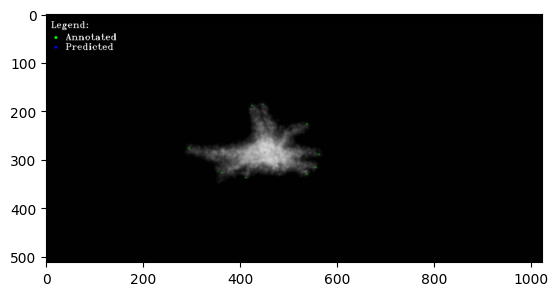

In [32]:
#Graph: checkpoints - this cell is to find out which amount of checkpoints is the best for the model. 
#Auswertung und erstellen der Statistik über alle Bilder  

from pytorchyolo import detect, models
import importlib
import tools  
importlib.reload(tools) 
from tools import statistix, stat_pic, vis_picture
from datetime import datetime

file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()

for ckpt in range(1, 101,2): #go through all the checkpoints from 1 to 100 in steps of 5. 
    #for tracking the compilation time
    start_time = datetime.now()

    model = models.load_model("config/yolov3-tiny-custom.cfg", f"checkpoints/yolov3_ckpt_{ckpt}.pth") #load the trained model with its weights

    all_stats = statistix() # create a statistic object 

    
    #now we go through all the pictures we wanna add to the statistics: 
    # Parameter:
    ev_conf_thres=0.5
    ev_nms_thres=0.5
    ev_accepted_distance=15

    for val_file in val_paths:
        val_file = val_file.split('/')[-1]
        detect_picture(filename= val_file.rstrip(),
                    img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images",
                    pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/predicted_labels",
                    model = model, #we use the once loaded model from the cell above to not waist time. 
                    conf_thres=ev_conf_thres,
                    nms_thres=ev_nms_thres,
                    accepted_distance = ev_accepted_distance,
                    stat_all_pics= all_stats, 
                    show = False
                    )
    #stop the compilation time
    end_time = datetime.now()
    duration = end_time - start_time 

    # Calculate duration in d/h/m/s format
    days = duration.days
    hours, remainder = divmod(duration.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
    ev_time=duration_str
    # Print the duration
    print('Duration:', duration_str)
    ### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
    all_stats.print_values
    x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = all_stats.x_get_values()
    
    x_epochs=ckpt
    #write to csv: 
    with open('baseline_ckpts.csv', 'a', newline='') as file:
        writer= csv.writer(file)
        writer.writerow([key,
                         x_data, rotate, boxsize, x_n_gen, x_bb_gen, x_n_data, xval, xcust_only,
                         x_model, x_epochs, x_pretrained_weights, x_multi_scale, x_iou_thres, x_conf_thres, x_nms_thres,
                         xseed, x_train_time,ev_time, k_cross_val,
                         x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate,
                         ev_conf_thres, ev_nms_thres, ev_accepted_distance])
    





In [1]:
#Graph: ev nms threshold:
#Graph: checkpoints - this cell is to find out which amount of checkpoints is the best for the model. 
#Auswertung und erstellen der Statistik über alle Bilder  

from pytorchyolo import detect, models
import importlib
import tools  
importlib.reload(tools) 
from tools import statistix, stat_pic, vis_picture
from datetime import datetime

file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()

nms_steps =  np.arange(0.6, 1, 0.01)  # Note: The stop value is exclusive, so use 0.6 to include 0.5


for step in nms_steps: #go through all the checkpoints from 1 to 100 in steps of 5. 
    #for tracking the compilation time
    start_time = datetime.now()

    model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/yolov3_ckpt_100.pth") #load the trained model with its weights

    all_stats = statistix() # create a statistic object 

    
    #now we go through all the pictures we wanna add to the statistics: 
    # Parameter:
    ev_conf_thres=0.01
    ev_nms_thres=step
    ev_accepted_distance=15

    for val_file in val_paths:
        val_file = val_file.split('/')[-1]
        detect_picture(filename= val_file.rstrip(),
                    img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images",
                    pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/predicted_labels",
                    model = model, #we use the once loaded model from the cell above to not waist time. 
                    conf_thres=ev_conf_thres,
                    nms_thres=ev_nms_thres,
                    accepted_distance = ev_accepted_distance,
                    stat_all_pics= all_stats, 
                    show = False
                    )

    #compilation time
    end_time = datetime.now()
    duration = end_time - start_time 

    days = duration.days
    hours, remainder = divmod(duration.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
    ev_time=duration_str

    print('Duration:', duration_str)
    ### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
    all_stats.print_values
    x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = all_stats.x_get_values()
    
    x_epochs=100

    #write to csv: 
    with open('ev_nms_thres.csv', 'a', newline='') as file:
        writer= csv.writer(file)
        writer.writerow([key,
                         x_data, rotate, boxsize, x_n_gen, x_bb_gen, x_n_data, xval, xcust_only,
                         x_model, x_epochs, x_pretrained_weights, x_multi_scale, x_iou_thres, x_conf_thres, x_nms_thres,
                         xseed, x_train_time,ev_time, k_cross_val,
                         x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate,
                         ev_conf_thres, ev_nms_thres, ev_accepted_distance])
    





KeyboardInterrupt: 

In [11]:
#Graph: ev conf threshold:
#Graph: checkpoints - this cell is to find out which amount of checkpoints is the best for the model. 
#Auswertung und erstellen der Statistik über alle Bilder  

from pytorchyolo import detect, models
import importlib
import tools  
importlib.reload(tools) 
from tools import statistix, stat_pic, vis_picture, detect_picture
from datetime import datetime
import numpy as np 
import torch
from datetime import datetime
import os


file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()

conf_steps = np.arange(0.15, 1.025, 0.025)  # 0.51 to include 0.5
#conf_steps = np.unique(np.concatenate((range1, range2)))

model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/yolov3_ckpt_100.pth") #load the trained model with its weights
ev_nms_thres=0.1
ev_accepted_distance=15
x_gpu = "NVIDIA GeForce MX450"
key= "ev_conf_thres"
x_epochs=100
in_wsl, in_windows = True, True 

for step in conf_steps: #go through all the checkpoints from 1 to 100 in steps of 5. 
    #for tracking the compilation time
    start_time = datetime.now()

    all_stats = statistix() # create a statistic object 

    #now we go through all the pictures we wanna add to the statistics: 
    # Parameter:
    ev_conf_thres=step

    for val_file in val_paths:
        val_file = val_file.split('/')[-1]
        detect_picture(filename= val_file.rstrip(),
                    img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images",
                    pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/predicted_labels",
                    model = model, #we use the once loaded model from the cell above to not waist time. 
                    conf_thres=ev_conf_thres,
                    nms_thres=ev_nms_thres,
                    accepted_distance = ev_accepted_distance,
                    stat_all_pics= all_stats, 
                    show = False
                    )

    #compilation time
    end_time = datetime.now()
    duration = end_time - start_time 

    days = duration.days
    hours, remainder = divmod(duration.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
    ev_time=duration_str

    print(step)
    #print('Duration:', duration_str)
    ### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
    all_stats.print_values
    x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = all_stats.x_get_values()

        # current time 
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d %H:%M:%S") #format the time 

    with open('train_conf_thres2.csv', 'a', newline='') as file:
        writer= csv.writer(file)
        writer.writerow([key,
                     x_data, rotate, boxsize, x_n_gen, x_bb_gen, x_n_data, xval, xcust_only,
                     x_model, x_epochs, x_pretrained_weights, x_multi_scale, x_iou_thres, x_conf_thres, x_nms_thres,
                     xseed, x_gpu, current_time, x_train_time,ev_time, k_cross_val, in_wsl, in_windows,
                     x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate,
                     ev_conf_thres, ev_nms_thres, ev_accepted_distance])
    
    





box: no predicted points in R4_P40_3
0.15
box: no predicted points in R4_P40_3
0.175
box: no predicted points in R6_P25_2_180
box: no predicted points in R4_P40_3
box: no predicted points in R4_P35_0
box: no predicted points in R4_P30_2_180
box: no predicted points in R5_P40_1
box: no predicted points in R2_P25_11
box: no predicted points in R4_P30_9_180
box: no predicted points in R4_P35_1_90
box: no predicted points in R1_P25_3_180
box: no predicted points in R1_P35_4_180
0.19999999999999998
box: no predicted points in R6_P25_8
box: no predicted points in R4_P25_10_180
box: no predicted points in R6_P30_5_180
box: no predicted points in R6_P25_2_180
box: no predicted points in R4_P40_3
box: no predicted points in R4_P35_0
box: no predicted points in R5_P25_3_90
box: no predicted points in R4_P30_2_180
box: no predicted points in R2_P25_10_90
box: no predicted points in R5_P35_4
box: no predicted points in R1_P30_2
box: no predicted points in R5_P40_1
box: no predicted points in R2_P2

In [31]:
#Graph: ev nms threshold:
#Graph: checkpoints - this cell is to find out which amount of checkpoints is the best for the model. 
#Auswertung und erstellen der Statistik über alle Bilder  

from pytorchyolo import detect, models
import importlib
import tools  
importlib.reload(tools) 
from tools import statistix, stat_pic, vis_picture
from datetime import datetime

file_val = open("data/custom_rot/valid.txt", "r")
val_paths = file_val.readlines()
file_val.close()

d_steps =  np.arange(50, 51, 1)  # Note: The stop value is exclusive, so use 0.6 to include 0.5


for step in d_steps: #go through all the checkpoints from 1 to 100 in steps of 5. 
    #for tracking the compilation time
    start_time = datetime.now()

    model = models.load_model("config/yolov3-tiny-custom.cfg", "checkpoints/yolov3_ckpt_100.pth") #load the trained model with its weights

    all_stats = statistix() # create a statistic object 

    
    #now we go through all the pictures we wanna add to the statistics: 
    # Parameter:
    ev_conf_thres=0.01
    ev_nms_thres=0.1
    ev_accepted_distance=step

    for val_file in val_paths:
        val_file = val_file.split('/')[-1]
        detect_picture(filename= val_file.rstrip(),
                    img_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/images",
                    pred_label_path = "/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/data/custom_rot/predicted_labels",
                    model = model, #we use the once loaded model from the cell above to not waist time. 
                    conf_thres=ev_conf_thres,
                    nms_thres=ev_nms_thres,
                    accepted_distance = ev_accepted_distance,
                    stat_all_pics= all_stats, 
                    show = False
                    )

    #compilation time
    end_time = datetime.now()
    duration = end_time - start_time 

    days = duration.days
    hours, remainder = divmod(duration.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    duration_str = f"{days}d/{hours}h/{minutes}m/{seconds}s"
    ev_time=duration_str

    print('Duration:', duration_str)
    print(step)
    ### hier müssen wir alle daten noch in Variablen abspeichern um sie in eine xlx datei zu speichern. 
    all_stats.print_values
    x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate = all_stats.x_get_values()
    
    x_epochs=100

    #write to csv: 
    with open('accepted_distance.csv', 'a', newline='') as file:
        writer= csv.writer(file)
        writer.writerow([key,
                         x_data, rotate, boxsize, x_n_gen, x_bb_gen, x_n_data, xval, xcust_only,
                         x_model, x_epochs, x_pretrained_weights, x_multi_scale, x_iou_thres, x_conf_thres, x_nms_thres,
                         xseed, x_train_time,ev_time, k_cross_val,
                         x_n_not_annotated, x_sens, x_over_det_rate, x_no_hit_p_rate,
                         ev_conf_thres, ev_nms_thres, ev_accepted_distance])
    





/mnt/c/Users/vinze/Dropbox/Universität/8.Bachelorarbeit/yolo2/PyTorch-YOLOv3/pytorchyolo/models.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

Duration: 0d/0h/0m/20s
50


In [ ]:
glxinfo | grep "OpenGL renderer string" | sed -E 's/.*\(([^()]*)\)$/\1/'


In [27]:
x_iou_thres = 0.5